In [1]:
from fastai.tabular import *

In [2]:
path = 'C:/Users/Jorge Mejia/Desktop/analisis_de_las_variables_de_la_esquizotipia_con_deep_learning/analisis_con_dataset_original/'
path

'C:/Users/Jorge Mejia/Desktop/analisis_de_las_variables_de_la_esquizotipia_con_deep_learning/analisis_con_dataset_original/'

In [3]:
df = pd.read_csv(path + 'dataset_esquizotipia_original.csv')
df.head()

,ESTRES_PERCIBIDO,CSI_RESPROBL,CSI_REESTCOGN,CSI_APOYOSOC,CSI_EXPEMOC,CSI_EVITPROBL,CSI_PENSDESID,CSI_RETISOC,CSI_AUTOCRIT,ANSIEDADRASGO,...,SCL90_PSICOT,CAPE_POSIT_FREC,CAPE_POS_MALESTAR,CAPE_NEG_FREC,CAPE_NEG_MALESTAR,CAPE_DEPRE_FREC,CAPE_DEPRE_MALESTAR,TRAUMA_FRECUENCIA,TRAUMA_AFECTACION,SPQ_TOTAL_ESQUIZOT
0,23,17,5,0,0,7,5,13,2,20,...,0,24,4,14,0,8,0,4,8,0
1,22,13,11,3,10,6,11,17,11,17,...,9,22,2,29,33,11,3,9,29,0
2,10,20,20,20,16,11,8,3,0,20,...,5,30,9,29,21,10,2,12,25,1
3,7,12,1,0,7,4,6,3,1,18,...,0,20,0,16,2,8,0,4,10,0
4,31,8,9,17,13,4,14,2,6,27,...,17,35,13,36,26,19,19,17,48,2


In [4]:
procs = [FillMissing, Categorify, Normalize]

In [5]:
# se selecciona un 85% de los datos para entrenamiento y un 15% de los datos para validación
valid_idx  =  range ( len ( df ) - 43 ,  len ( df ))

In [6]:
# Se define la variable dependiente
dep_var  =  'SPQ_TOTAL_ESQUIZOT'

In [7]:
data = TabularDataBunch.from_df(path, df, dep_var, valid_idx=valid_idx, procs=procs)
print(data.train_ds.cont_names) # `cont_names` defaults to: set(df)-set(cat_names)-{dep_var}

['CSI_EXPEMOC', 'CSI_APOYOSOC', 'CSL90_SENS_INT', 'CAPE_NEG_MALESTAR', 'CAPE_DEPRE_MALESTAR', 'ANSIEDADRASGO', 'CSI_EVITPROBL', 'CSI_RETISOC', 'SCL90_DEPRE', 'CAPE_POSIT_FREC', 'TRAUMA_AFECTACION', 'SCL90_PSICOT', 'SCL90_ANSIE', 'CSI_REESTCOGN', 'CSL90_HOSTIL', 'CSI_AUTOCRIT', 'SCL90_SOMAT', 'CSI_PENSDESID', 'SCL90_OBS_COMP', 'CAPE_POS_MALESTAR', 'CAPE_DEPRE_FREC', 'TRAUMA_FRECUENCIA', 'SCL90_ANS_FOB', 'CSI_RESPROBL', 'SCL90_IDEA_PARAN', 'ESTRES_PERCIBIDO', 'CAPE_NEG_FREC']


In [8]:
(cat_x,cont_x),y = next(iter(data.train_dl))
for o in (cat_x, cont_x, y): print(to_np(o[:5]))

[0 0 0 0 0]
[[-0.028819 -0.423752  1.164443 -1.504172 ... -0.517872  0.860113  1.107736  0.98166 ]
 [-1.353713 -1.438252 -0.743763 -0.042482 ...  1.308879  0.274111  0.509824  0.441358]
 [ 0.160452  1.774331 -0.471162  0.231585 ... -1.126788 -0.70256   1.466483 -0.098944]
 [ 0.538993  0.759831 -1.016364 -0.773327 ...  0.49699  -0.897894 -1.283911 -0.774322]
 [ 1.485346  1.774331 -0.880063 -1.321461 ...  0.699962 -0.507226  0.390242 -1.044473]]
[1 0 0 0 0]


In [9]:
learn = tabular_learner(data, layers=[100,50], metrics=accuracy)
learn.fit(2)

epoch,train_loss,valid_loss,accuracy,time
0,1.100762,1.036140,0.511628,03:49
1,0.960925,0.966850,0.534884,03:34


CSI_EXPEMOC,CSI_APOYOSOC,CSL90_SENS_INT,CAPE_NEG_MALESTAR,CAPE_DEPRE_MALESTAR,ANSIEDADRASGO,CSI_EVITPROBL,CSI_RETISOC,SCL90_DEPRE,CAPE_POSIT_FREC,TRAUMA_AFECTACION,SCL90_PSICOT,SCL90_ANSIE,CSI_REESTCOGN,CSL90_HOSTIL,CSI_AUTOCRIT,SCL90_SOMAT,CSI_PENSDESID,SCL90_OBS_COMP,CAPE_POS_MALESTAR,CAPE_DEPRE_FREC,TRAUMA_FRECUENCIA,SCL90_ANS_FOB,CSI_RESPROBL,SCL90_IDEA_PARAN,ESTRES_PERCIBIDO,CAPE_NEG_FREC,target,prediction
0.3497,1.6052,-0.6075,-0.0425,0.4405,0.3519,1.6571,-0.8236,0.8337,-0.1545,-0.1317,0.5051,0.6526,-0.3993,-0.6153,2.0858,0.5156,0.7717,0.3242,0.2197,0.1242,-0.3719,-0.6880,-0.7208,-0.8979,1.5861,0.0361,0,0
-0.0288,-0.0856,-0.8801,-0.1338,-0.9407,-0.7190,-0.5445,-0.4005,-1.0102,-0.3149,-0.7283,-0.8305,-0.9115,1.8312,-0.6153,-0.5605,-0.9378,-1.2250,-1.0786,-0.6739,-0.8044,-0.9380,-0.6880,1.5119,-0.8979,-1.2839,-0.3691,0,0
0.1605,-0.0856,0.6192,0.6884,1.4073,0.1990,0.3361,0.2342,1.7155,-0.1545,-0.6005,1.1729,2.5776,0.3442,0.4588,0.4980,1.8721,0.1061,1.1874,0.2197,0.5885,-0.7493,2.0954,-0.3149,1.2508,1.1077,0.1712,0,2
-1.3537,-1.4383,0.3466,0.0489,0.0261,-1.0250,2.7579,2.5613,1.2345,-0.3149,1.6155,-0.1627,-0.3100,-1.1428,1.3180,-0.3841,0.5156,0.6053,1.1874,-0.4505,1.2849,1.9866,0.0542,-1.5327,0.0788,0.8686,1.7921,1,2
-1.5430,-1.6073,1.3007,1.3279,1.9598,-0.8720,-1.2050,1.0804,0.4328,-0.1545,0.1666,0.2380,0.5323,-1.7004,0.0292,0.4980,1.0000,-1.0586,0.7558,0.3314,1.0528,-0.3719,0.2398,-1.7357,1.4461,1.3469,1.2518,1,2


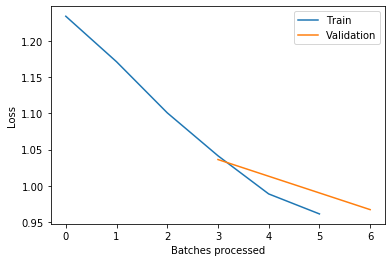

In [10]:
learn.recorder.plot_losses()
learn.show_results()